In [3]:
def filterfunction(data):
    accx = data['accX']
    accz = data['accZ']
    roty = data['rotY']
    ss_angle = 0;
    alpha = 0.04
    sv= []
    for n in range(0, len(data)):
        xacc = accx[n]
        zacc = accz[n]
        ygyro = roty[n]
        
        theta = math.atan2(xacc,zacc)
        ss_angle = (1-alpha)*(ss_angle + (ygyro/104))+alpha*theta
        sv.append(ss_angle*(180/3.14))
    return sv
        


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math


data1 = pd.read_csv("a_HN_data4.csv", header=None)
data1.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data2 = pd.read_csv("a_VN_data4.csv", header=None)
data2.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data3 = pd.read_csv("a_HO_data4.csv", header=None)
data3.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data4 = pd.read_csv("a_VO_data4.csv", header=None)
data4.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data5 = pd.read_csv("a_HN_data14.csv", header=None)
data5.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#data5 = pd.read_csv("RN_data15.csv", header=None)
#data5.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data6 = pd.read_csv("a_VN_data14.csv", header=None)
data6.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data7 = pd.read_csv("a_HO_data14.csv", header=None)
data7.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#data7 = pd.read_csv("RO_data15.csv", header=None)
#data7.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data8 = pd.read_csv("a_VO_data14.csv", header=None)
data8.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#Rightknee data 15




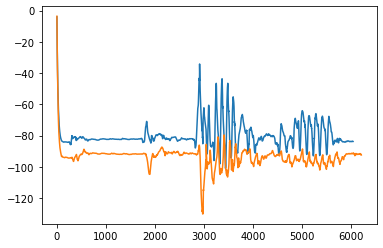

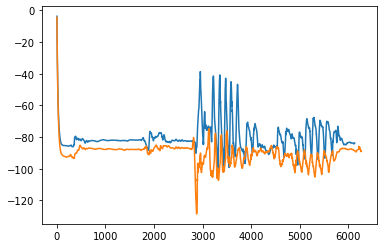

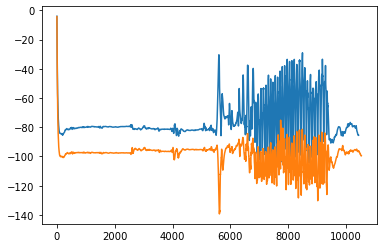

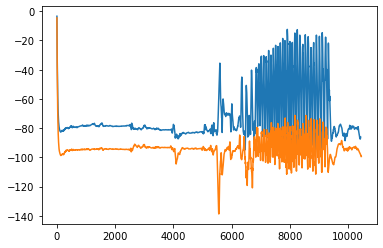

In [36]:

plt.plot(filterfunction(data1))
plt.plot(filterfunction(data3))
plt.show()

plt.plot(filterfunction(data2))
plt.plot(filterfunction(data4))
plt.show()

plt.plot(filterfunction(data5))
plt.plot(filterfunction(data7))
plt.show()

plt.plot(filterfunction(data6))
plt.plot(filterfunction(data8))
plt.show()


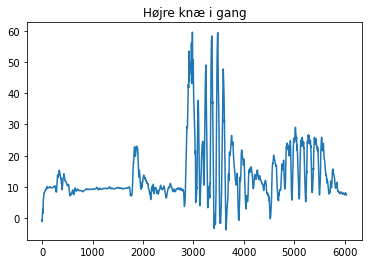

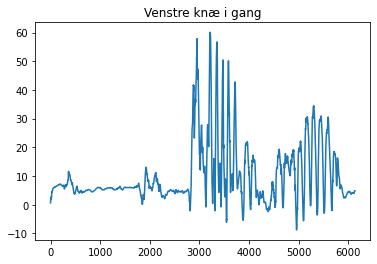

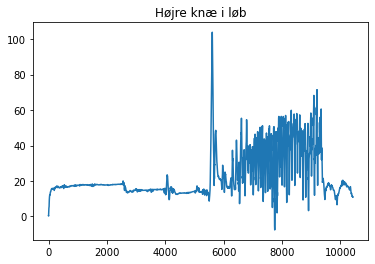

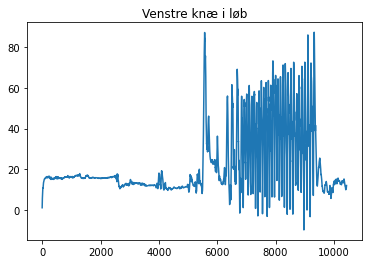

In [37]:
ppF1 = [] #Højre knæ i gang
ppF2 = [] #Venstre knæ i gang
ppF3 = [] #Højre knæ i løb
ppF4 = [] #Venstre knæ i løb

for item1, item2 in zip(filterfunction(data3), filterfunction(data1)):
    item = item1 - item2
    ppF1.append(item*-1)
    
plt.plot(ppF1)
plt.title("Højre knæ i gang")
plt.show()

for item1, item2 in zip(filterfunction(data4), filterfunction(data2)):
    item = item1 - item2
    ppF2.append(item*-1)

plt.plot(ppF2)
plt.title("Venstre knæ i gang")
plt.show()

for item1, item2 in zip(filterfunction(data7), filterfunction(data5)):
    item = item1 - item2
    ppF3.append(item*-1)

plt.plot(ppF3)
plt.title("Højre knæ i løb")
plt.show()

for item1, item2 in zip(filterfunction(data8), filterfunction(data6)):
    item = item1 - item2
    ppF4.append(item*-1)

plt.plot(ppF4)
plt.title("Venstre knæ i løb")
plt.show()


In [38]:
ppF1 = pd.DataFrame(ppF1)
ppF1.columns = ['X']
ppF1.to_csv('ppF1.csv')

ppF2 = pd.DataFrame(ppF2)
ppF2.columns = ['X']
ppF2.to_csv('ppF2.csv')

ppF3 = pd.DataFrame(ppF3)
ppF3.columns = ['X']
ppF3.to_csv('ppF3.csv')

ppF4 = pd.DataFrame(ppF4)
ppF4.columns = ['X']
ppF4.to_csv('ppF4.csv')


In [39]:
SPORTS_leftknee_walk = pd.read_csv('ppF2.csv')
SPORTS_rightknee_walk = pd.read_csv('ppF1.csv')
SPORTS_leftknee_run = pd.read_csv('ppF4.csv')
SPORTS_rightknee_run = pd.read_csv('ppF3.csv')
Vicon_leftknee_walk = pd.read_csv('PRO_leftknee.csv')
Vicon_rightknee_walk = pd.read_csv('PRO_rightknee.csv')
Vicon_leftknee_run = pd.read_csv('PRO_leftknee2.csv')
Vicon_rightknee_run = pd.read_csv('PRO_rightknee2.csv')

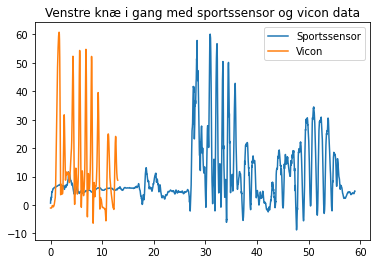

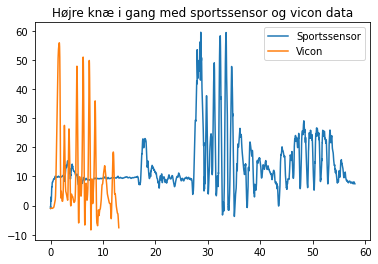

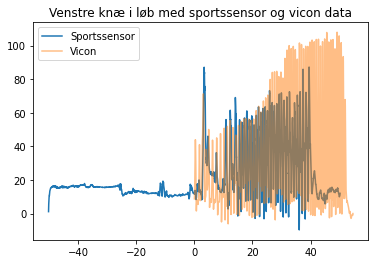

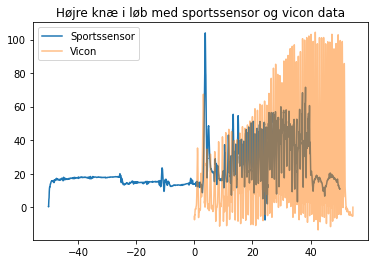

In [42]:

plt.plot(SPORTS_leftknee_walk.index/104, SPORTS_leftknee_walk['X'])
plt.plot(Vicon_leftknee_walk.index/200, Vicon_leftknee_walk['X'])
plt.legend(["Sportssensor", "Vicon"])
plt.title("Venstre knæ i gang med sportssensor og vicon data")
plt.show()

plt.plot(SPORTS_rightknee_walk.index/104, SPORTS_rightknee_walk['X'])
plt.plot((Vicon_rightknee_walk.index)/200, Vicon_rightknee_walk['X'])
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i gang med sportssensor og vicon data")
plt.show()

plt.plot((SPORTS_leftknee_run.index-5220)/104, SPORTS_leftknee_run['X'])
plt.plot((Vicon_leftknee_run.index)/200, Vicon_leftknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Venstre knæ i løb med sportssensor og vicon data")
plt.show()

plt.plot((SPORTS_rightknee_run.index-5220)/104, SPORTS_rightknee_run['X'])
plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()

